# 1-Import libraries

In [71]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coffee-bean-sales-dataset/saudi_cities_geocoding.csv
/kaggle/input/coffee-bean-sales-dataset/DatasetForCoffeeSales.csv


# 2 - Upload dataset

In [72]:
#Download and Read the csv file
df = pd.read_csv('/kaggle/input/coffee-bean-sales-dataset/DatasetForCoffeeSales.csv', sep=',')

In [73]:
df.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount
0,2023-01-01,32,Riyadh,coffee beans,Colombian,40,14,560,False,0.000000
1,2023-01-02,49,Abha,coffee beans,Costa Rica,35,17,595,False,0.000000
2,2023-01-03,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0.000000
3,2023-01-04,80,Abha,coffee beans,Ethiopian,45,1,45,False,0.000000
4,2023-01-05,78,Hail,coffee beans,Colombian,40,46,1840,True,419.913612


In [74]:
# Get the shape of the DataFrame
df.shape

(730, 10)

In [75]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             730 non-null    object 
 1   Customer_ID      730 non-null    int64  
 2   City             730 non-null    object 
 3   Category         730 non-null    object 
 4   Product          730 non-null    object 
 5   Unit Price       730 non-null    int64  
 6   Quantity         730 non-null    int64  
 7   Sales Amount     730 non-null    int64  
 8   Used_Discount    730 non-null    bool   
 9   Discount_Amount  730 non-null    float64
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 52.2+ KB


# 3 - Clean Data

In [76]:
# Duplicate rows
df.duplicated().sum()

0

In [77]:
df.isnull().sum()

Date               0
Customer_ID        0
City               0
Category           0
Product            0
Unit Price         0
Quantity           0
Sales Amount       0
Used_Discount      0
Discount_Amount    0
dtype: int64

# 4. Analysis and Data Visualization

In [78]:
#the Total Sales for each Day
TotalSalesDay = df.groupby(['Date'])['Sales Amount'].sum().reset_index()
TotalSalesDay

,Date,Sales Amount
0,2023-01-01,560
1,2023-01-02,595
2,2023-01-03,665
3,2023-01-04,45
4,2023-01-05,1840
...,...,...
725,2024-12-26,1040
726,2024-12-27,400
727,2024-12-28,1645
728,2024-12-29,135


In [79]:
Sorted_TotalSales = TotalSalesDay.sort_values(by='Sales Amount',ascending=False)
# Select the top 10 Total Sales
top_10_Sales = Sorted_TotalSales.head(10)

top_10_Sales

,Date,Sales Amount
270,2023-09-28,2205
15,2023-01-16,2205
402,2024-02-07,2205
614,2024-09-06,2205
678,2024-11-09,2160
586,2024-08-09,2160
18,2023-01-19,2160
312,2023-11-09,2160
476,2024-04-21,2160
379,2024-01-15,2115


In [80]:
import plotly.express as px

fig = px.line(TotalSalesDay, x="Date", y="Sales Amount", title='Total Sales')
fig.show()

In [81]:
#the Quantity Soled for each Day
QuantitySoledDay = df.groupby(['Date'])['Quantity'].sum().reset_index()
QuantitySoledDay

,Date,Quantity
0,2023-01-01,14
1,2023-01-02,17
2,2023-01-03,19
3,2023-01-04,1
4,2023-01-05,46
...,...,...
725,2024-12-26,26
726,2024-12-27,10
727,2024-12-28,47
728,2024-12-29,3


In [82]:
Sorted_QuantitySoled = QuantitySoledDay.sort_values(by='Quantity',ascending=False)
# Select the top 10 Quantity Soled
top_10_QuantitySoled = Sorted_QuantitySoled.head(10)

top_10_QuantitySoled

,Date,Quantity
270,2023-09-28,49
179,2023-06-29,49
313,2023-11-10,49
614,2024-09-06,49
355,2023-12-22,49
696,2024-11-27,49
700,2024-12-01,49
577,2024-07-31,49
402,2024-02-07,49
15,2023-01-16,49


In [83]:
#line chart for Quantity Soled
fig = px.line(QuantitySoledDay, x="Date", y="Quantity", title='Quantity Soled')
fig.show()

In [84]:
#the Total Sales by customer
CustomerTotalSales = df.groupby(['Customer_ID'])['Sales Amount'].sum().reset_index()
CustomerTotalSales

,Customer_ID,Sales Amount
0,1,4060
1,2,16860
2,3,5065
3,4,9295
4,5,5345
...,...,...
95,96,7410
96,97,15615
97,98,3915
98,99,4830


In [85]:
Sorted_CusromerSales = CustomerTotalSales.sort_values(by='Sales Amount',ascending=False)
# Select the top 10 Customer
top_10_Customers = Sorted_CusromerSales.head(10)

top_10_Customers

,Customer_ID,Sales Amount
1,2,16860
96,97,15615
81,82,14240
80,81,13225
44,45,12665
49,50,12405
59,60,11480
46,47,10925
8,9,10685
71,72,10645


In [86]:
#bar chart
fig = px.bar(top_10_Customers, x='Customer_ID', y='Sales Amount')
fig.show()

In [87]:
#the Total Sales by Products
ProductsTotalSales = df.groupby(['Product'])['Sales Amount'].sum().reset_index()
ProductsTotalSales

Sorted_ProductsSales = ProductsTotalSales.sort_values(by='Sales Amount',ascending=False)
Sorted_ProductsSales

,Product,Sales Amount
1,Colombian,162880
2,Costa Rica,155820
3,Ethiopian,148410
4,Guatemala,119875
0,Brazilian,113760


In [88]:
#pie chart
fig = px.pie(ProductsTotalSales, values='Sales Amount', names='Product', title='Total Sales by Products')
fig.show()

In [89]:
#the Total Sales by Citys
CitysTotalSales = df.groupby(['City'])['Sales Amount'].sum().reset_index()
CitysTotalSales

Sorted_CitysSales = CitysTotalSales.sort_values(by='Sales Amount',ascending=False)
Sorted_CitysSales

,City,Sales Amount
3,Hail,85495
4,Jeddah,79320
8,Riyadh,75595
6,Mecca,74735
7,Medina,70710
5,Khobar,67890
2,Dammam,67060
1,Buraidah,65500
0,Abha,58455
9,Tabuk,55985


In [90]:
#pie chart
fig = px.pie(CitysTotalSales, values='Sales Amount', names='City', title='Total Sales by Citys')
fig.show()

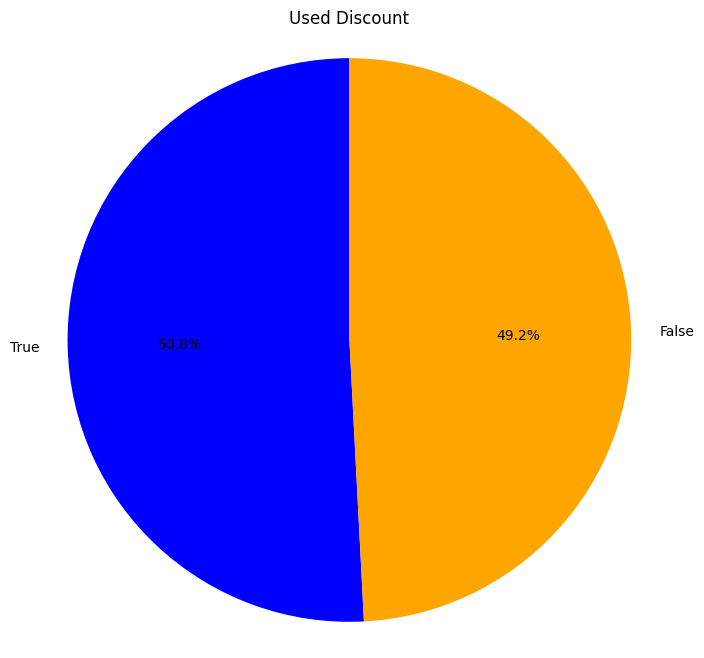

In [91]:
#Used Discount
Used_Discount_counts=df['Used_Discount'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(df['Used_Discount'].value_counts(), labels=Used_Discount_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Used Discount')
plt.axis('equal') 
plt.show()
